<a href="https://colab.research.google.com/github/rosagrandio/GOOGLE_CLOUD_DEPLOYMENT/blob/master/Tasa_abandono_especialidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GENERACION DE MODELO DE ABANDONO ESTUDIANTES ESPECIALIDADES MEDICINA

Partiendo de los datos de 1470 estudiantes de especialidad (datos ficticios) se creará un modelo que permitirá evaluar la probabilidad de abandono de cada nuevo estudiante.

Librerías y dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# montar disco

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
employee_df=pd.read_csv("/content/drive/My Drive/estudiantes_especialidad.csv", encoding='latin1')

In [ ]:
# enlace drive
employee_df = pd.read_csv("/content/drive/My Drive/estudiantes_especialidad.csv", encoding='latin1')

In [ ]:
employee_df

In [ ]:
employee_df.head(5)

In [ ]:
employee_df.tail(5)

In [ ]:
employee_df.info()
# 35 características en total, cada una con 1470 puntos de datos

In [ ]:
employee_df.describe()

# TAREA #3: VISUALIZACIÓN DEL DATASET

In [ ]:
# reemplazar columnas 'Attritition', 'Over18 y 'Overtime' por enteros antes de poder llevar a cabo cualquier visualización
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
employee_df.head(4)

In [ ]:
# comprobación ausencia datos
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

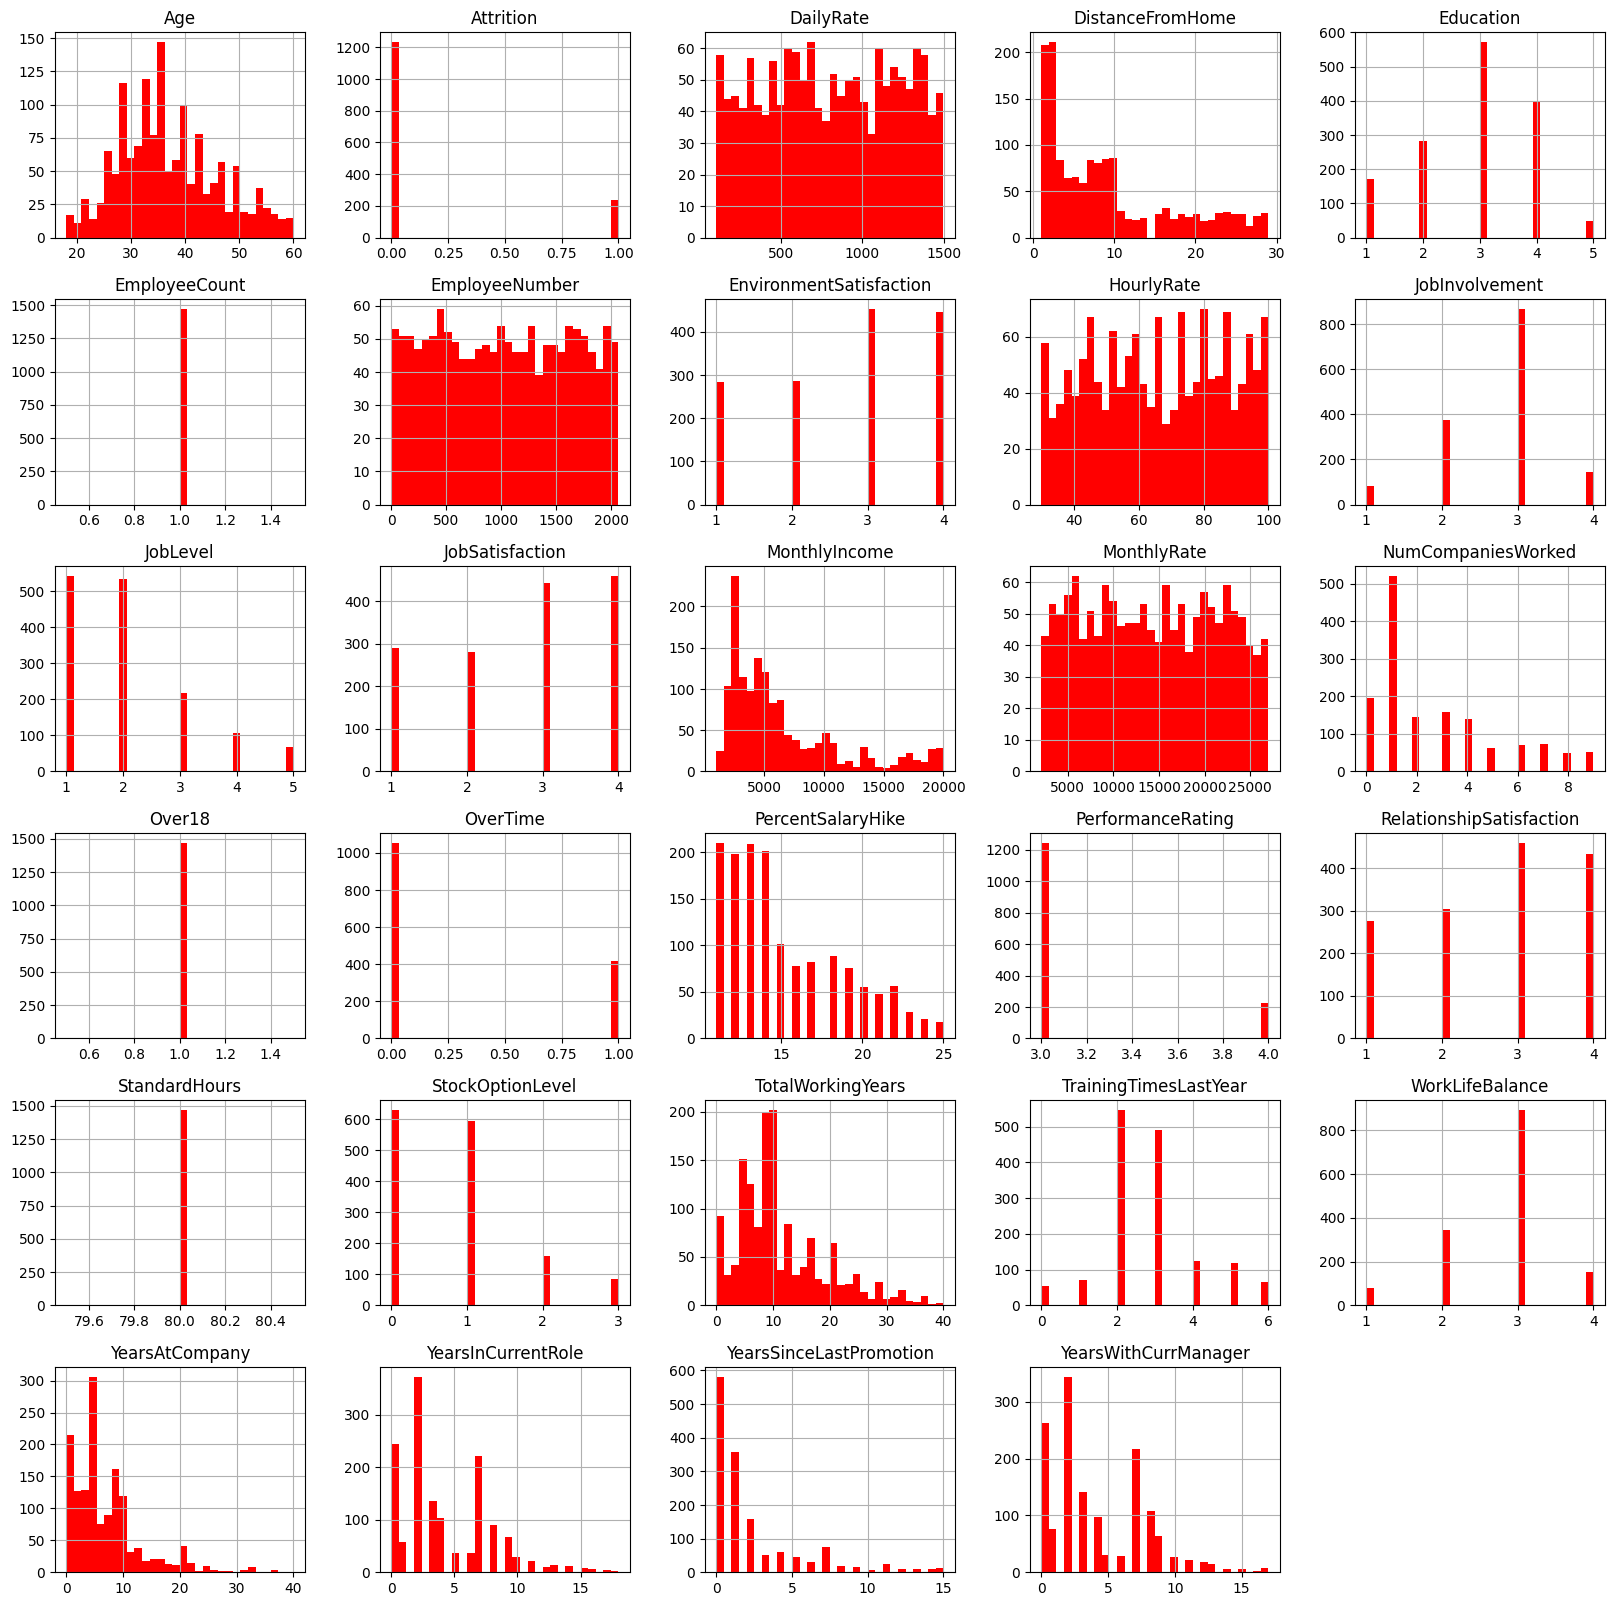

In [ ]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'r')
# long tail distribution)
# eliminar 'EmployeeCount' y 'Standardhours' ya que estos campos no cambian de un empleado a otro

In [ ]:
# eliminar 'EmployeeCount' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro y'EmployeeNumber' también
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

In [ ]:
# datos de médicos que dejan especialidad
left_df   = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
# Contamos el número de estudiantes que se quedaron y que se fueron

print("Total = ", len(employee_df))

print("Número de estudiantes que dejan los estudios = ", len(left_df))
print("Porcentaje de estudiantes que dejan los estudios = ", 1.*len(left_df)/len(employee_df)*100.0, "%")

print("Número de estudiantes que continúan los estudios = ", len(stayed_df))
print("Porcentaje de estudiantes que continúan los estudios = ", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total =  1470
Número de estudiantes que dejan los estudios =  237
Porcentaje de estudiantes que dejan los estudios =  16.122448979591837 %
Número de estudiantes que continúan los estudios =  1233
Porcentaje de estudiantes que continúan los estudios =  83.87755102040816 %


In [ ]:
left_df.describe()

# Comparemos la media y el error estándar de los estudiantes daron es mayor en comparación con los que se fueron
# 'DailyRate': El rate diario de los estudiantes que se quedaron es mayor
# 'DistanceFromHome': Los estudiantes que se quedan viven más cerca del trabajo
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Los estudiantes que se quedan están en general más satisfechos con sus trabajos
# 'StockOptionLevel': Los estudiantes que se quedan tienen un mayor nivel de complementos

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<Axes: >

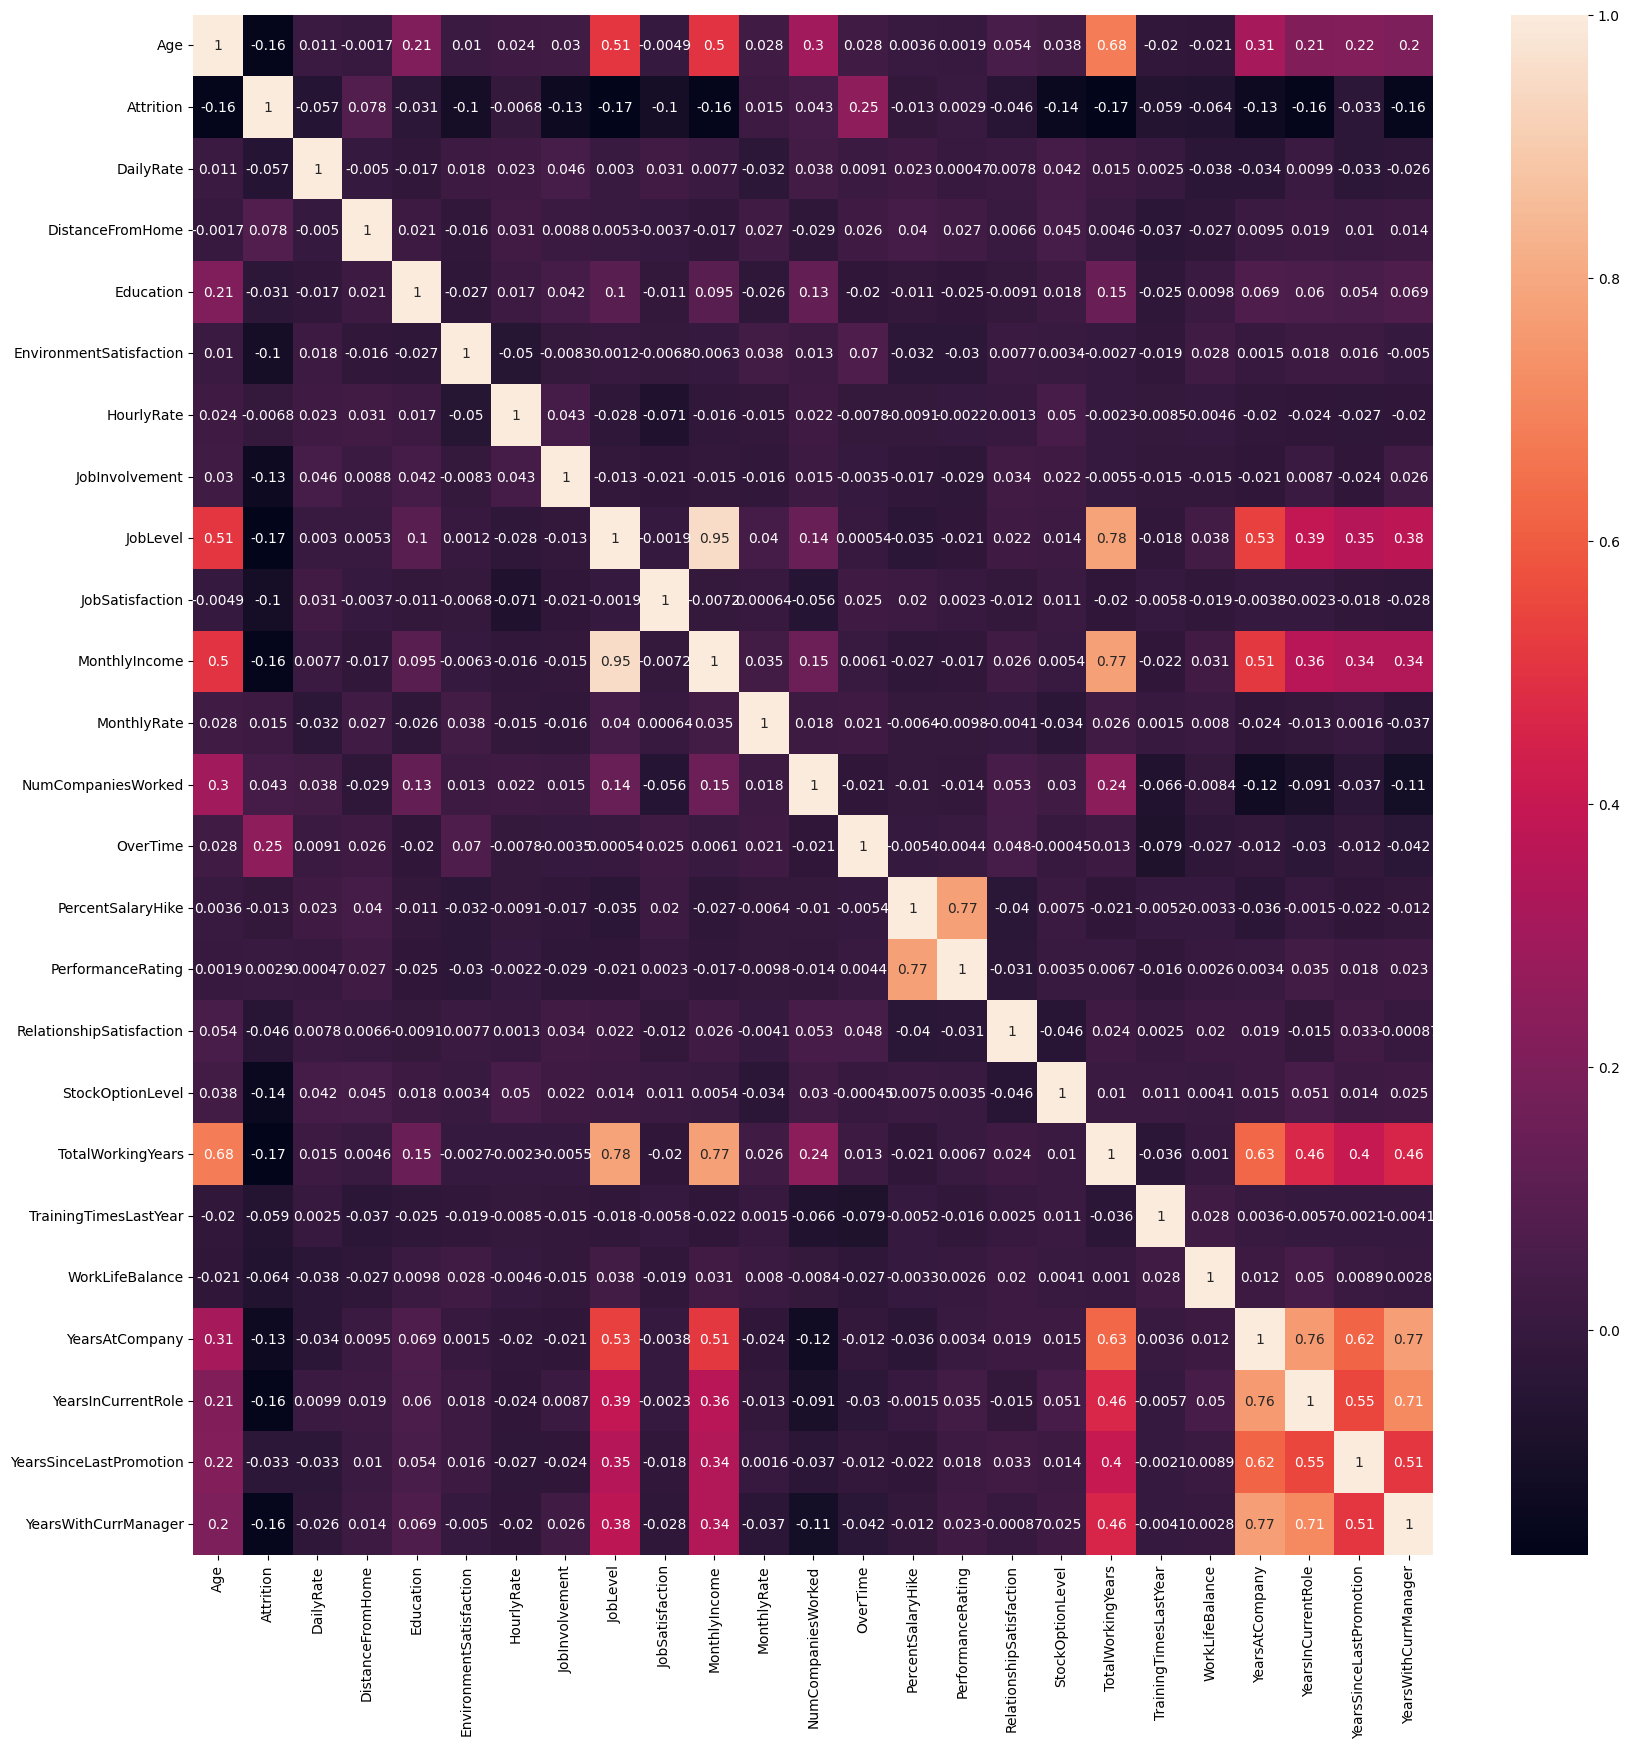

In [ ]:
numerical_df = employee_df.select_dtypes(include=np.number)
correlations = numerical_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
# Job level está altamente correlacionado con el número total de horas de trabajo
# Monthly income está altamente correlacionado con Job level
# Monthly income está altamente correlacionado con el número total de horas de trabajo
# Age está altamente correlacionado con los ingresos mensuales

<Axes: xlabel='Age', ylabel='count'>

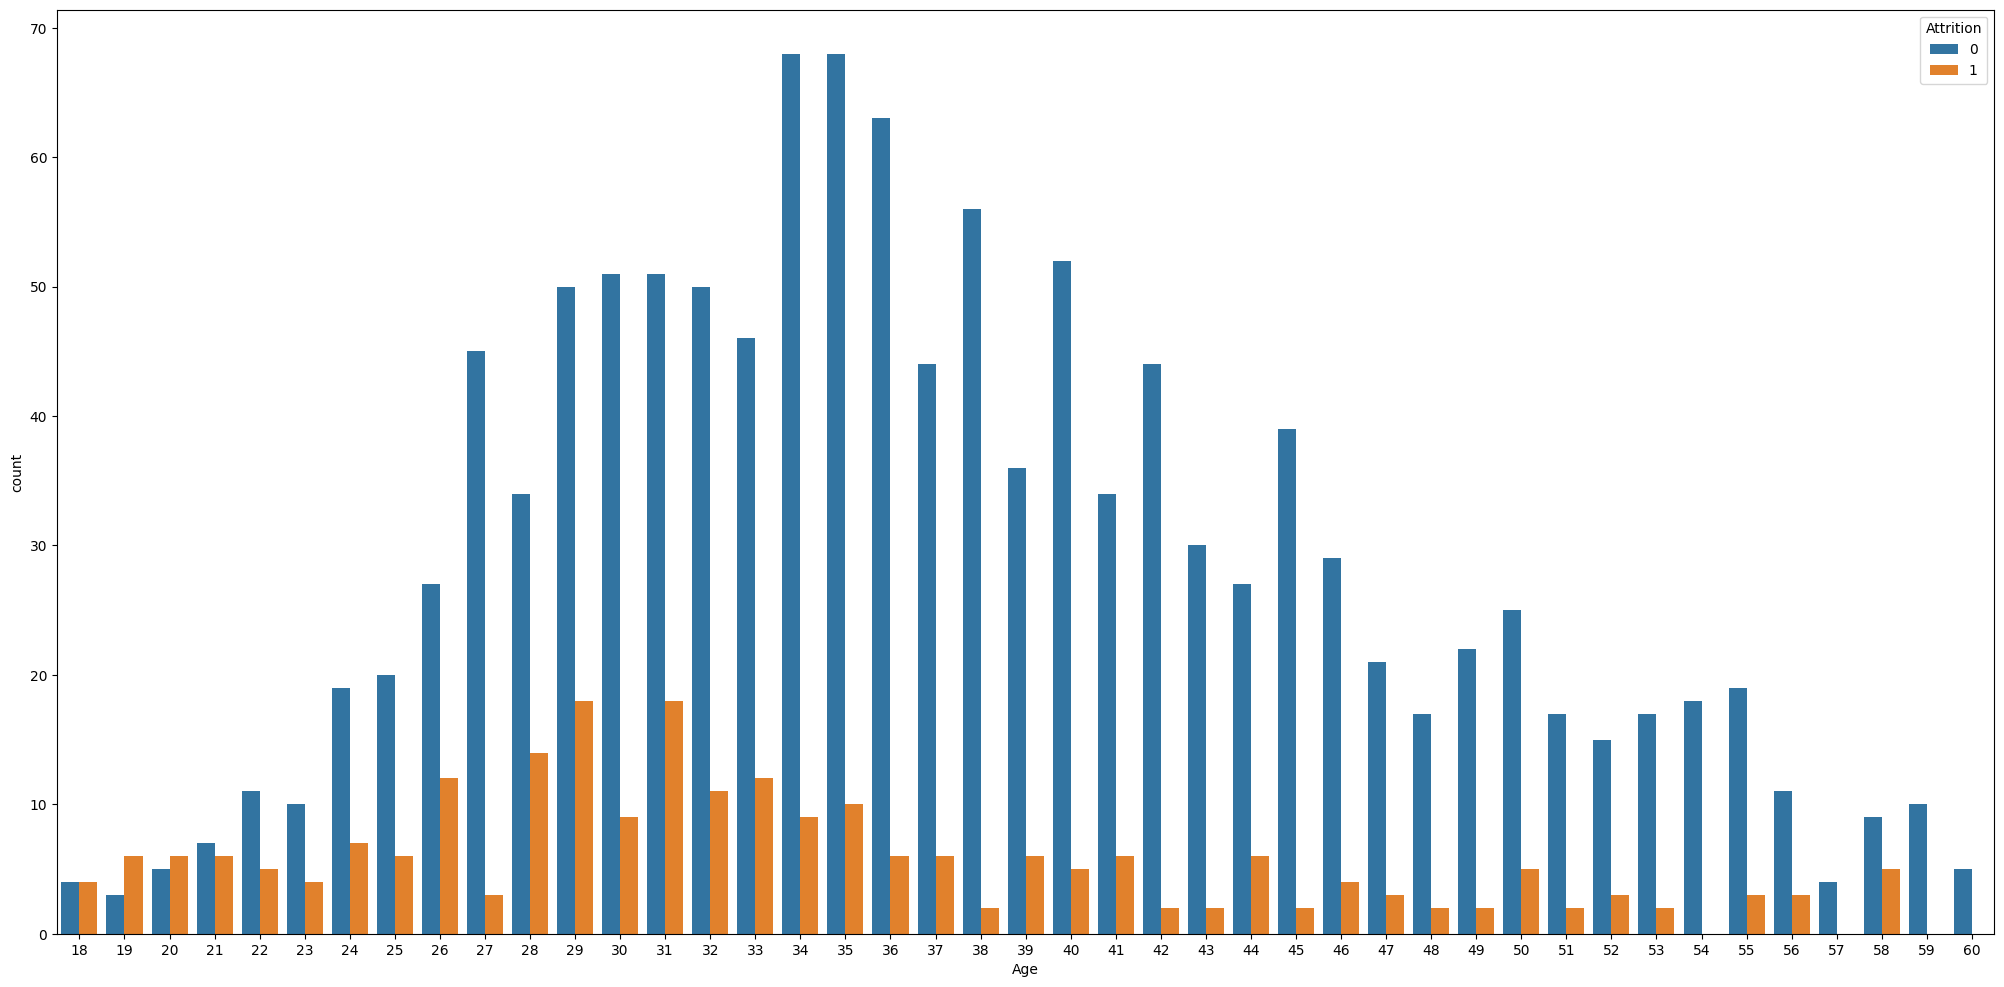

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


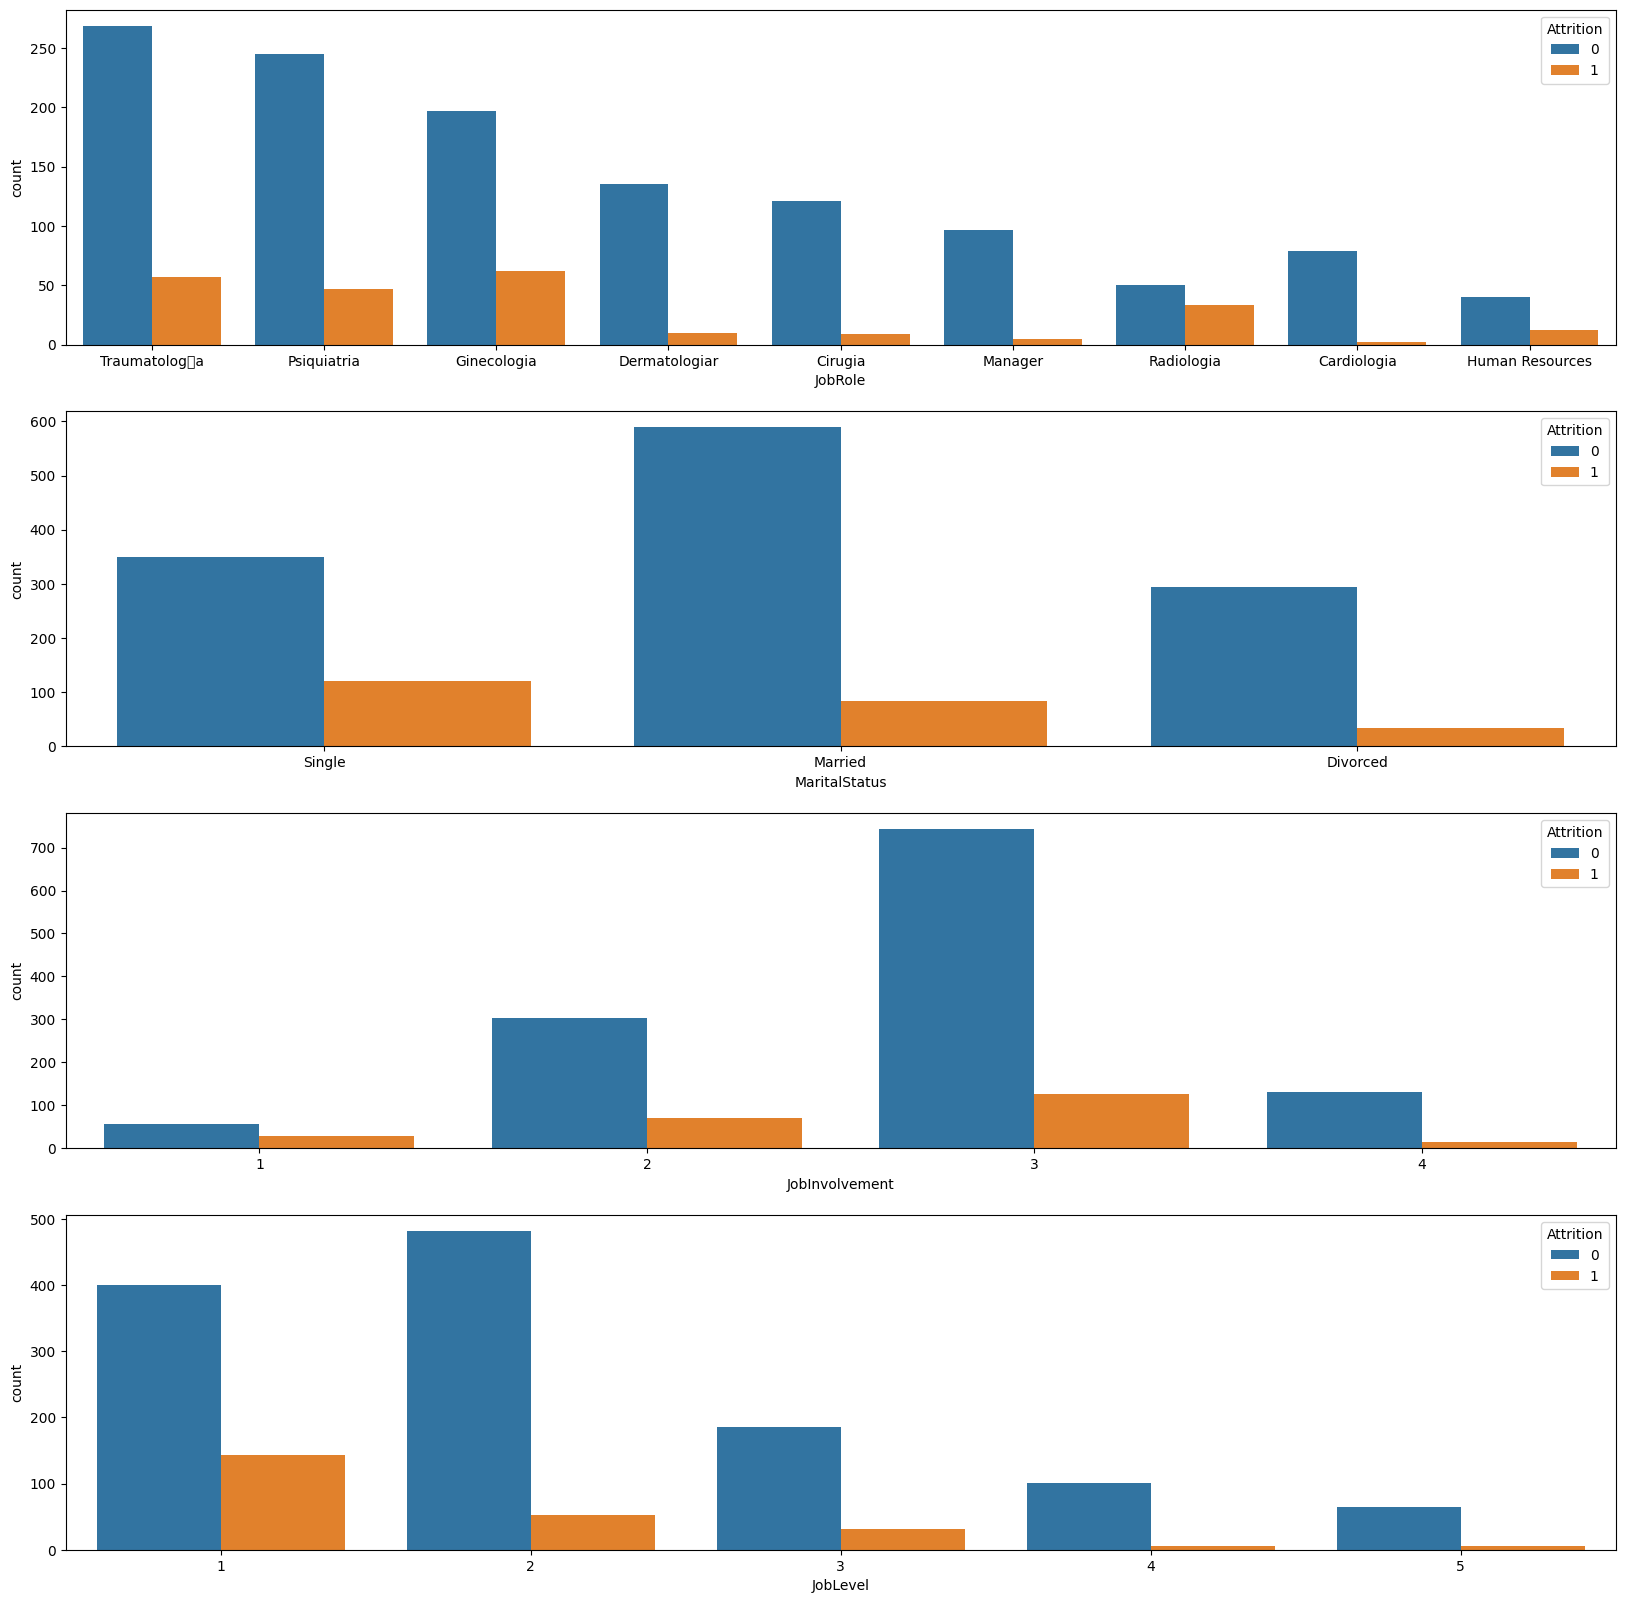

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

# Los estudiantes solteros tienden a irse en comparación con los casados ​​y divorciados
# Los representantes de ventas tienden a irse en comparación con cualquier otro departamento
# Los estudiantes menos involucrados tienden a dejar los estudios
# Los menos experimentados (nivel laboral bajo) tienden a dejar los estudios

/tmp/ipython-input-108739890.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'r')
/tmp/ipython-input-108739890.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')


Text(0.5, 0, 'Distancia desde Casa al Trabajo')

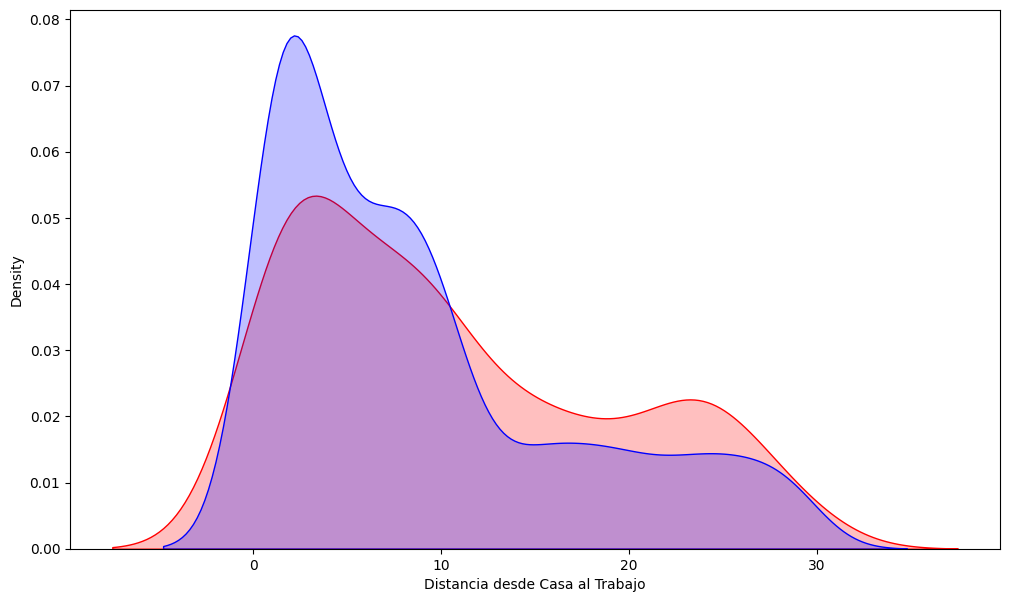

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = "Empleados que se quedan", shade = True, color = 'b')

plt.xlabel('Distancia desde Casa al Trabajo')


/tmp/ipython-input-1240999633.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label = "Estudiantes que abandonan", shade = True, color = 'r')
/tmp/ipython-input-1240999633.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Estudiantes que terminan la especialidad", shade = True, color = 'b')


Text(0.5, 0, 'Años con su coordinador Actual')

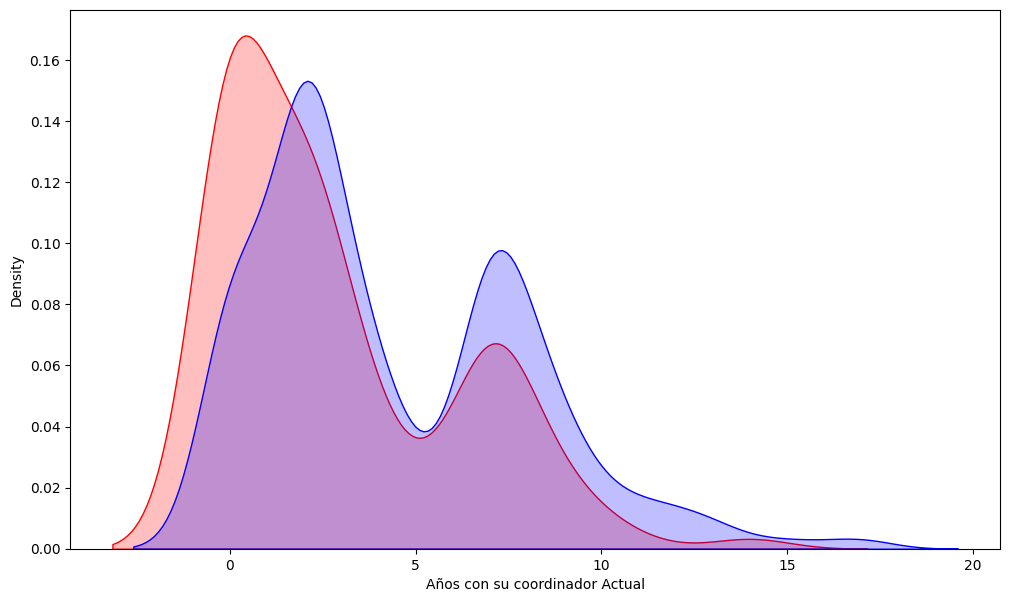

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = "Estudiantes que abandonan", shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Estudiantes que terminan la especialidad", shade = True, color = 'b')

plt.xlabel('Años con su coordinador Actual')

/tmp/ipython-input-1533083962.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label = "Estudiantes que abandonan", shade = True, color = 'r')
/tmp/ipython-input-1533083962.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Estudiantes que terminan la especialidad", shade = True, color = 'b')


Text(0.5, 0, 'Número total de años')

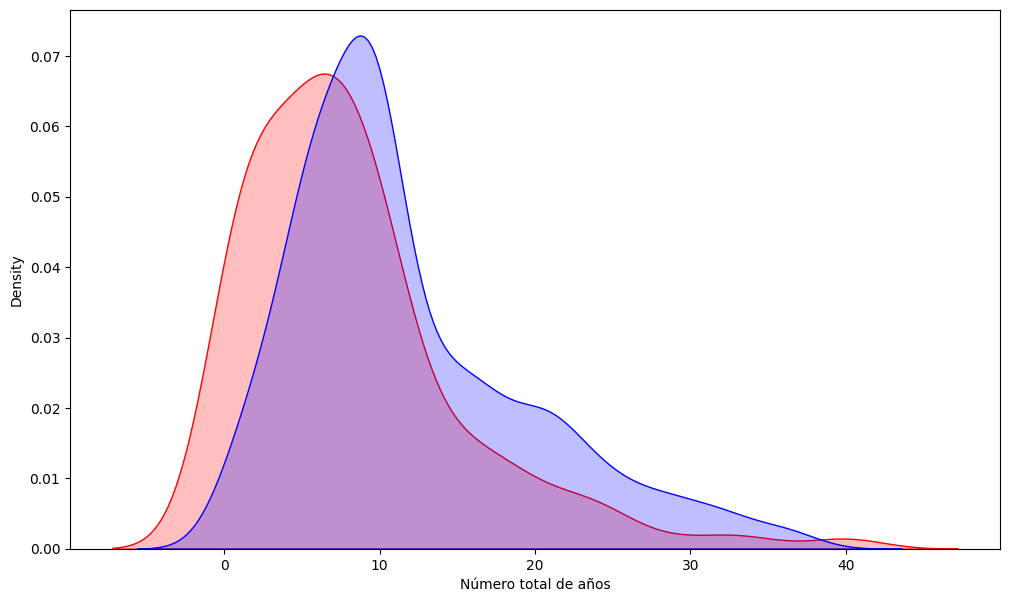

In [ ]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = "Estudiantes que abandonan", shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Estudiantes que terminan la especialidad", shade = True, color = 'b')

plt.xlabel('Número total de años')


<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

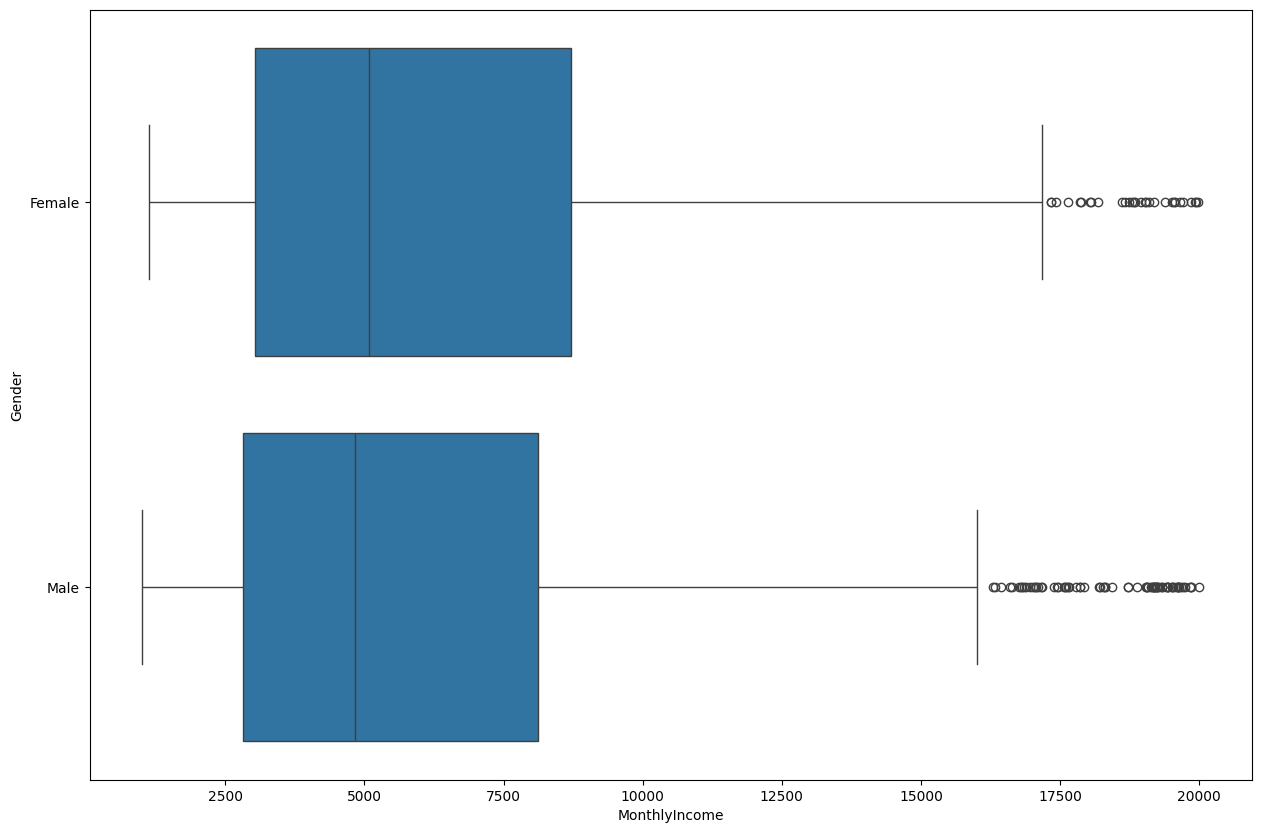

In [ ]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


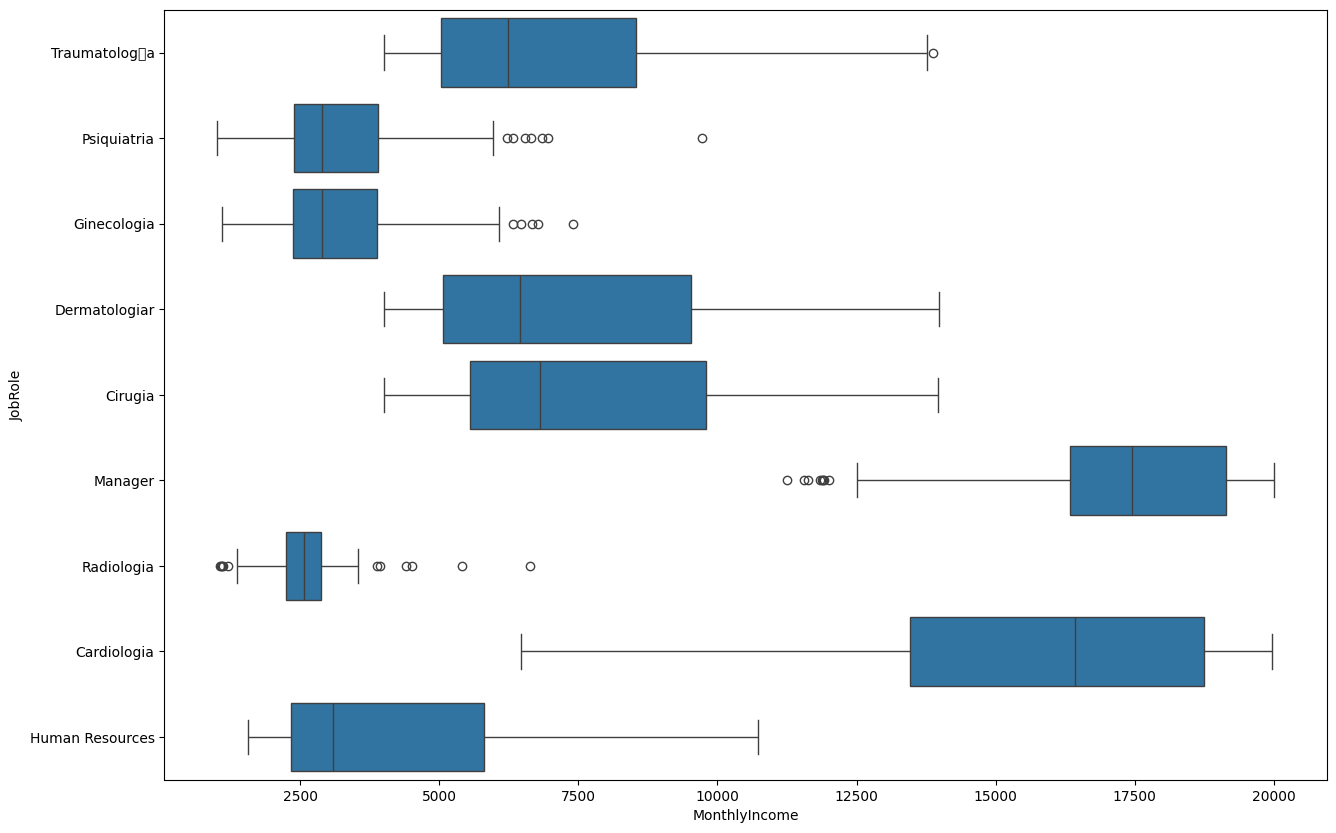

In [ ]:
# Veamos los ingresos mensuales vs. rol de trabajo
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

# TAREA #4: CREAR LOS DATA SETS DE ENTRENAMIENTO Y TESTING Y LLEVAR A CABO LA LIMPIEZA DE DATOS

In [ ]:
employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [ ]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [ ]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Traumatologa,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Psiquiatria,Married
2,Travel_Rarely,Research & Development,Other,Male,Ginecologia,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Psiquiatria,Married
4,Travel_Rarely,Research & Development,Medical,Male,Ginecologia,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Ginecologia,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Cirugia,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Dermatologiar,Married
1468,Travel_Frequently,Sales,Medical,Male,Traumatologa,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
 X_cat = pd.DataFrame(X_cat)
 X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Notemos que hemos elminado la columna target, 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str) # En las versiones actuales es necesario para que todas las columnas sean tipo String
X = scaler.fit_transform(X_all)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
y = employee_df['Attrition']
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO LA REGRESIÓN LOGÍSTICA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
X_test.shape

(368, 50)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 89.94565217391305 %


<Axes: >

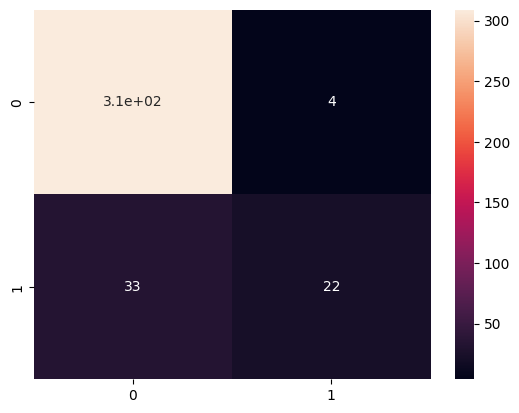

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       313
           1       0.85      0.40      0.54        55

    accuracy                           0.90       368
   macro avg       0.87      0.69      0.74       368
weighted avg       0.89      0.90      0.88       368



# ENTRENAR Y EVALUR UN CLASIFICADOR UTILIZANDO BOSQUES ALEATORIOS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

<Axes: >

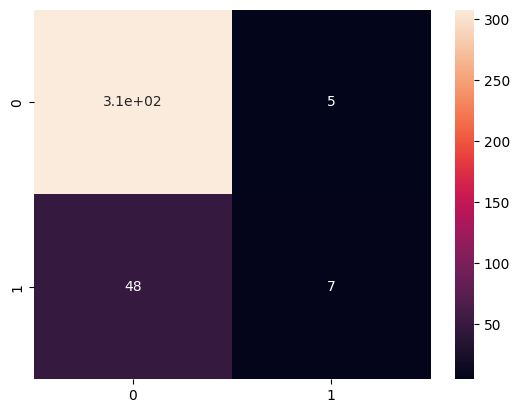

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       313
           1       0.58      0.13      0.21        55

    accuracy                           0.86       368
   macro avg       0.72      0.56      0.56       368
weighted avg       0.82      0.86      0.81       368



# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 500)            │        25,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 527,001 (2.01 MB)

 Trainable params: 527,001 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8419 - loss: 0.4833
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8371 - loss: 0.3608
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8791 - loss: 0.3108
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8939 - loss: 0.2941
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8758 - loss: 0.3165
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9136 - loss: 0.2246
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9213 - loss: 0.2101
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9243 - loss: 0.1889
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9428 - loss: 0.1454
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9652 - loss: 0.1025
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9743 - loss: 0.0818
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

In [ ]:
y_pred = model.predict(X_test)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[1.86003592e-06],
       [3.71683782e-05],
       [3.30165442e-08],
       [1.00000000e+00],
       [4.24420232e-09],
       [3.00049152e-11],
       [1.87641679e-04],
       [6.48712158e-01],
       [9.12615990e-12],
       [1.75946009e-13],
       [4.57128568e-04],
       [9.99998391e-01],
       [7.65064542e-05],
       [2.44114472e-16],
       [9.98123884e-01],
       [2.92079321e-08],
       [3.04302753e-14],
       [9.04860575e-10],
       [1.00000000e+00],
       [2.66822830e-08],
       [1.04784322e-05],
       [4.22501358e-08],
       [3.79529837e-07],
       [9.49020684e-09],
       [2.21053273e-08],
       [4.29682387e-07],
       [3.04829794e-12],
       [1.26943206e-07],
       [5.61463272e-11],
       [3.49849397e-05],
       [5.46158896e-09],
       [1.27171189e-01],
       [5.67541880e-09],
       [1.13911713e-10],
       [2.09343568e-07],
       [8.53705290e-13],
       [1.00000000e+00],
       [1.36355496e-07],
       [3.18452493e-07],
       [8.38471959e-09],


In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [ ]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

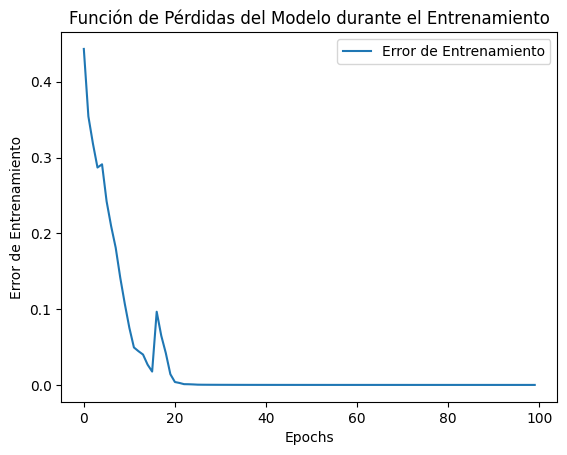

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

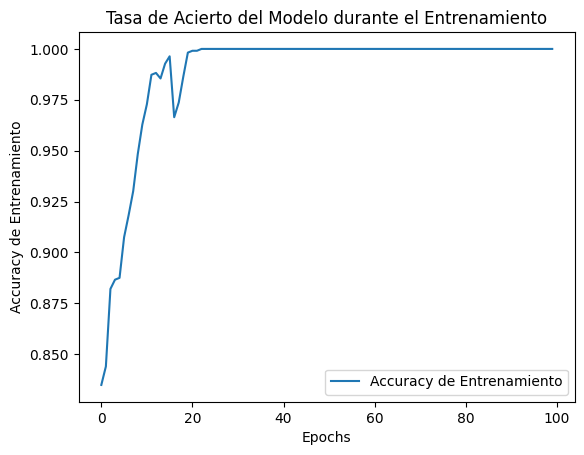

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

<Axes: >

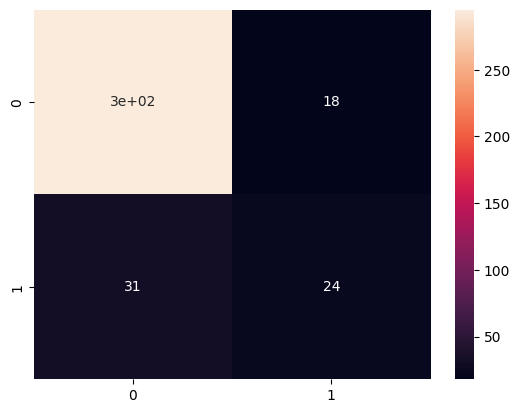

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       313
           1       0.57      0.44      0.49        55

    accuracy                           0.87       368
   macro avg       0.74      0.69      0.71       368
weighted avg       0.86      0.87      0.86       368



In [ ]:
observation_data = {
    'Age': 30,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'DailyRate': 780,
    'EducationField': 'Life Sciences',
    'Gender': 'Male',
    'JobRole': 'Laboratory Technician',
    'MaritalStatus': 'Single',
    'DistanceFromHome': 15,
    'Education': 3,
    'EnvironmentSatisfaction': 2,
    'HourlyRate': 65,
    'JobInvolvement': 2,
    'JobLevel': 1,
    'JobSatisfaction': 2,
    'MonthlyIncome': 4500,
    'MonthlyRate': 7000,
    'NumCompaniesWorked': 2,
    'OverTime': 0,
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 2,
    'StockOptionLevel': 0,
    'TotalWorkingYears': 5,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 3,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2
}
print("Modify the 'observation_data' dictionary with the values for the student you want to predict attrition for, then run this cell.")

Modify the 'observation_data' dictionary with the values for the student you want to predict attrition for, then run this cell.


In [ ]:
import pandas as pd

new_observation_df = pd.DataFrame([observation_data])

# Separate categorical and numerical features for the new observation
X_cat_new = new_observation_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_numerical_new = new_observation_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Apply one-hot encoding to categorical features (using the already fitted encoder)
# The .toarray() is implicitly handled by sparse_output=False in the onehotencoder setup in the previous cell.
X_cat_new_encoded = onehotencoder.transform(X_cat_new)
X_cat_new_encoded = pd.DataFrame(X_cat_new_encoded, columns=onehotencoder.get_feature_names_out(X_cat_new.columns))

# Concatenate the encoded categorical and numerical features
X_observation_processed = pd.concat([X_cat_new_encoded, X_numerical_new], axis=1)

# Ensure column names are strings for the scaler (as done for X_all)
X_observation_processed.columns = X_observation_processed.columns.astype(str)

# Apply scaling to the processed observation (using the already fitted scaler)
X_observation_scaled = scaler.transform(X_observation_processed)

print("Observation data has been preprocessed and is ready for prediction.")

Observation data has been preprocessed and is ready for prediction.


In [ ]:
X_cat_original_cols = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
# Re-initialize and fit the OneHotEncoder to ensure it captures all original categories correctly
# Set handle_unknown='ignore' to allow the encoder to process new, unseen categories gracefully.
# Set sparse_output=False to ensure a dense array output, which is easier for pandas.DataFrame.
onehotencoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded_array = onehotencoder.fit_transform(X_cat_original_cols)
X_cat = pd.DataFrame(X_cat_encoded_array, columns=onehotencoder.get_feature_names_out(X_cat_original_cols.columns))

# Re-create X_all with the correctly named categorical features
X_all = pd.concat([X_cat, X_numerical], axis=1)

# Ensure column names are strings for the scaler (as done previously)
X_all.columns = X_all.columns.astype(str)

# Re-fit the scaler on the corrected X_all
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

print("One-hot encoded categorical features for training data (X_cat) have been re-created with proper column names and unknown category handling.")
print("X_all and scaler have been re-initialized and re-fitted.")
print(X_cat.head())

One-hot encoded categorical features for training data (X_cat) have been re-created with proper column names and unknown category handling.
X_all and scaler have been re-initialized and re-fitted.
   BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               0.0   
3                        0.0                               1.0   
4                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   

   Department_Research & De

In [ ]:
new_student_prediction_proba = model.predict(X_observation_scaled)
new_student_prediction = (new_student_prediction_proba > 0.5).astype(int)

print(f"Predicted attrition probability for the new student: {new_student_prediction_proba[0][0]:.4f}")
if new_student_prediction[0][0] == 1:
    print("Prediction: The student is likely to abandon their studies.")
else:
    print("Prediction: The student is likely to continue their studies.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted attrition probability for the new student: 0.0053
Prediction: The student is likely to continue their studies.
